## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.4ms	remaining: 58.4s
1:	learn: 0.9606716	total: 59.4ms	remaining: 29.6s
2:	learn: 0.9390920	total: 60.6ms	remaining: 20.1s
3:	learn: 0.9209237	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9046978	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8896854	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8724151	total: 64.8ms	remaining: 9.19s
7:	learn: 0.8558633	total: 65.7ms	remaining: 8.15s
8:	learn: 0.8400199	total: 66.7ms	remaining: 7.34s
9:	learn: 0.8229065	total: 67.6ms	remaining: 6.69s
10:	learn: 0.8057776	total: 68.4ms	remaining: 6.15s
11:	learn: 0.7907426	total: 69.2ms	remaining: 5.7s
12:	learn: 0.7753485	total: 70ms	remaining: 5.32s
13:	learn: 0.7601130	total: 71ms	remaining: 5s
14:	learn: 0.7475256	total: 71.9ms	remaining: 4.72s
15:	learn: 0.7326054	total: 72.7ms	remaining: 4.47s
16:	learn: 0.7206853	total: 73.6ms	remaining: 4.25s
17:	learn: 0.7077303	total: 74.4ms	remaining: 4.06s
18:	learn: 0.6955287	total: 75.2ms	remaining: 3.88s


101:	learn: 0.3059717	total: 150ms	remaining: 1.32s
102:	learn: 0.3044976	total: 151ms	remaining: 1.32s
103:	learn: 0.3030824	total: 152ms	remaining: 1.31s
104:	learn: 0.3013455	total: 153ms	remaining: 1.3s
105:	learn: 0.2996238	total: 154ms	remaining: 1.3s
106:	learn: 0.2980370	total: 155ms	remaining: 1.29s
107:	learn: 0.2965967	total: 156ms	remaining: 1.29s
108:	learn: 0.2951864	total: 157ms	remaining: 1.28s
109:	learn: 0.2942861	total: 157ms	remaining: 1.27s
110:	learn: 0.2932928	total: 158ms	remaining: 1.27s
111:	learn: 0.2916150	total: 159ms	remaining: 1.26s
112:	learn: 0.2903158	total: 160ms	remaining: 1.25s
113:	learn: 0.2893044	total: 161ms	remaining: 1.25s
114:	learn: 0.2880453	total: 162ms	remaining: 1.24s
115:	learn: 0.2868924	total: 162ms	remaining: 1.24s
116:	learn: 0.2854905	total: 163ms	remaining: 1.23s
117:	learn: 0.2838426	total: 164ms	remaining: 1.23s
118:	learn: 0.2827228	total: 165ms	remaining: 1.22s
119:	learn: 0.2820207	total: 166ms	remaining: 1.22s
120:	learn: 0.

150:	learn: 0.2527124	total: 193ms	remaining: 1.08s
151:	learn: 0.2520669	total: 194ms	remaining: 1.08s
152:	learn: 0.2511829	total: 195ms	remaining: 1.08s
153:	learn: 0.2507161	total: 196ms	remaining: 1.08s
154:	learn: 0.2497802	total: 197ms	remaining: 1.07s
155:	learn: 0.2490613	total: 198ms	remaining: 1.07s
156:	learn: 0.2484356	total: 199ms	remaining: 1.07s
157:	learn: 0.2475208	total: 200ms	remaining: 1.06s
158:	learn: 0.2467460	total: 201ms	remaining: 1.06s
159:	learn: 0.2461317	total: 201ms	remaining: 1.06s
160:	learn: 0.2456028	total: 202ms	remaining: 1.05s
161:	learn: 0.2449256	total: 203ms	remaining: 1.05s
162:	learn: 0.2444113	total: 204ms	remaining: 1.05s
163:	learn: 0.2438126	total: 205ms	remaining: 1.04s
164:	learn: 0.2432080	total: 206ms	remaining: 1.04s
165:	learn: 0.2425986	total: 206ms	remaining: 1.04s
166:	learn: 0.2421108	total: 207ms	remaining: 1.03s
167:	learn: 0.2413956	total: 208ms	remaining: 1.03s
168:	learn: 0.2407630	total: 209ms	remaining: 1.03s
169:	learn: 

310:	learn: 0.1738419	total: 341ms	remaining: 755ms
311:	learn: 0.1734089	total: 342ms	remaining: 754ms
312:	learn: 0.1731178	total: 343ms	remaining: 753ms
313:	learn: 0.1727077	total: 344ms	remaining: 751ms
314:	learn: 0.1723778	total: 345ms	remaining: 750ms
315:	learn: 0.1720145	total: 345ms	remaining: 748ms
316:	learn: 0.1715627	total: 346ms	remaining: 746ms
317:	learn: 0.1714053	total: 347ms	remaining: 744ms
318:	learn: 0.1709797	total: 348ms	remaining: 743ms
319:	learn: 0.1706233	total: 349ms	remaining: 742ms
320:	learn: 0.1703284	total: 350ms	remaining: 740ms
321:	learn: 0.1700544	total: 351ms	remaining: 738ms
322:	learn: 0.1696955	total: 352ms	remaining: 737ms
323:	learn: 0.1695203	total: 352ms	remaining: 735ms
324:	learn: 0.1693707	total: 353ms	remaining: 734ms
325:	learn: 0.1690932	total: 354ms	remaining: 732ms
326:	learn: 0.1687871	total: 355ms	remaining: 731ms
327:	learn: 0.1684932	total: 356ms	remaining: 729ms
328:	learn: 0.1680740	total: 357ms	remaining: 727ms
329:	learn: 

358:	learn: 0.1595903	total: 384ms	remaining: 686ms
359:	learn: 0.1593606	total: 385ms	remaining: 685ms
360:	learn: 0.1590600	total: 386ms	remaining: 684ms
361:	learn: 0.1587473	total: 387ms	remaining: 683ms
362:	learn: 0.1585815	total: 388ms	remaining: 681ms
363:	learn: 0.1583085	total: 389ms	remaining: 680ms
364:	learn: 0.1579830	total: 390ms	remaining: 679ms
365:	learn: 0.1576744	total: 391ms	remaining: 677ms
366:	learn: 0.1574980	total: 392ms	remaining: 676ms
367:	learn: 0.1573862	total: 393ms	remaining: 675ms
368:	learn: 0.1572274	total: 394ms	remaining: 673ms
369:	learn: 0.1568606	total: 395ms	remaining: 672ms
370:	learn: 0.1564609	total: 396ms	remaining: 671ms
371:	learn: 0.1560608	total: 396ms	remaining: 669ms
372:	learn: 0.1558547	total: 397ms	remaining: 668ms
373:	learn: 0.1555605	total: 398ms	remaining: 667ms
374:	learn: 0.1552292	total: 399ms	remaining: 665ms
375:	learn: 0.1549435	total: 400ms	remaining: 664ms
376:	learn: 0.1546544	total: 401ms	remaining: 662ms
377:	learn: 

506:	learn: 0.1270468	total: 517ms	remaining: 503ms
507:	learn: 0.1268447	total: 518ms	remaining: 502ms
508:	learn: 0.1266565	total: 519ms	remaining: 501ms
509:	learn: 0.1265379	total: 520ms	remaining: 499ms
510:	learn: 0.1264936	total: 521ms	remaining: 498ms
511:	learn: 0.1263041	total: 522ms	remaining: 497ms
512:	learn: 0.1260636	total: 523ms	remaining: 496ms
513:	learn: 0.1257801	total: 524ms	remaining: 495ms
514:	learn: 0.1254765	total: 525ms	remaining: 494ms
515:	learn: 0.1254352	total: 525ms	remaining: 493ms
516:	learn: 0.1252340	total: 526ms	remaining: 492ms
517:	learn: 0.1252031	total: 527ms	remaining: 491ms
518:	learn: 0.1250256	total: 528ms	remaining: 489ms
519:	learn: 0.1247722	total: 529ms	remaining: 488ms
520:	learn: 0.1245918	total: 530ms	remaining: 487ms
521:	learn: 0.1243609	total: 531ms	remaining: 486ms
522:	learn: 0.1243283	total: 532ms	remaining: 485ms
523:	learn: 0.1241885	total: 533ms	remaining: 484ms
524:	learn: 0.1240465	total: 533ms	remaining: 483ms
525:	learn: 

554:	learn: 0.1189026	total: 560ms	remaining: 449ms
555:	learn: 0.1187021	total: 561ms	remaining: 448ms
556:	learn: 0.1185118	total: 562ms	remaining: 447ms
557:	learn: 0.1183468	total: 563ms	remaining: 446ms
558:	learn: 0.1181768	total: 564ms	remaining: 445ms
559:	learn: 0.1179853	total: 565ms	remaining: 444ms
560:	learn: 0.1177859	total: 566ms	remaining: 443ms
561:	learn: 0.1175936	total: 567ms	remaining: 442ms
562:	learn: 0.1174509	total: 567ms	remaining: 440ms
563:	learn: 0.1172948	total: 568ms	remaining: 439ms
564:	learn: 0.1171456	total: 569ms	remaining: 438ms
565:	learn: 0.1170940	total: 570ms	remaining: 437ms
566:	learn: 0.1169048	total: 571ms	remaining: 436ms
567:	learn: 0.1167425	total: 572ms	remaining: 435ms
568:	learn: 0.1166102	total: 572ms	remaining: 434ms
569:	learn: 0.1164306	total: 573ms	remaining: 433ms
570:	learn: 0.1162908	total: 574ms	remaining: 431ms
571:	learn: 0.1161027	total: 575ms	remaining: 430ms
572:	learn: 0.1159918	total: 576ms	remaining: 429ms
573:	learn: 

721:	learn: 0.0948780	total: 709ms	remaining: 273ms
722:	learn: 0.0947437	total: 710ms	remaining: 272ms
723:	learn: 0.0945983	total: 711ms	remaining: 271ms
724:	learn: 0.0944727	total: 712ms	remaining: 270ms
725:	learn: 0.0943233	total: 713ms	remaining: 269ms
726:	learn: 0.0941602	total: 713ms	remaining: 268ms
727:	learn: 0.0940411	total: 714ms	remaining: 267ms
728:	learn: 0.0939229	total: 715ms	remaining: 266ms
729:	learn: 0.0938195	total: 716ms	remaining: 265ms
730:	learn: 0.0936964	total: 717ms	remaining: 264ms
731:	learn: 0.0935119	total: 718ms	remaining: 263ms
732:	learn: 0.0934570	total: 719ms	remaining: 262ms
733:	learn: 0.0933055	total: 720ms	remaining: 261ms
734:	learn: 0.0932174	total: 721ms	remaining: 260ms
735:	learn: 0.0930800	total: 722ms	remaining: 259ms
736:	learn: 0.0929764	total: 723ms	remaining: 258ms
737:	learn: 0.0928240	total: 723ms	remaining: 257ms
738:	learn: 0.0927183	total: 724ms	remaining: 256ms
739:	learn: 0.0925957	total: 725ms	remaining: 255ms
740:	learn: 

769:	learn: 0.0891873	total: 752ms	remaining: 225ms
770:	learn: 0.0890086	total: 753ms	remaining: 224ms
771:	learn: 0.0888501	total: 754ms	remaining: 223ms
772:	learn: 0.0886622	total: 755ms	remaining: 222ms
773:	learn: 0.0885537	total: 756ms	remaining: 221ms
774:	learn: 0.0884440	total: 757ms	remaining: 220ms
775:	learn: 0.0883600	total: 758ms	remaining: 219ms
776:	learn: 0.0882487	total: 759ms	remaining: 218ms
777:	learn: 0.0881022	total: 759ms	remaining: 217ms
778:	learn: 0.0879793	total: 760ms	remaining: 216ms
779:	learn: 0.0879265	total: 761ms	remaining: 215ms
780:	learn: 0.0877857	total: 762ms	remaining: 214ms
781:	learn: 0.0877384	total: 763ms	remaining: 213ms
782:	learn: 0.0876342	total: 764ms	remaining: 212ms
783:	learn: 0.0874749	total: 765ms	remaining: 211ms
784:	learn: 0.0872790	total: 766ms	remaining: 210ms
785:	learn: 0.0871866	total: 767ms	remaining: 209ms
786:	learn: 0.0870605	total: 767ms	remaining: 208ms
787:	learn: 0.0869480	total: 768ms	remaining: 207ms
788:	learn: 

935:	learn: 0.0735927	total: 900ms	remaining: 61.5ms
936:	learn: 0.0734929	total: 901ms	remaining: 60.6ms
937:	learn: 0.0733790	total: 902ms	remaining: 59.6ms
938:	learn: 0.0733648	total: 903ms	remaining: 58.6ms
939:	learn: 0.0732843	total: 903ms	remaining: 57.7ms
940:	learn: 0.0732315	total: 904ms	remaining: 56.7ms
941:	learn: 0.0731403	total: 905ms	remaining: 55.7ms
942:	learn: 0.0730199	total: 906ms	remaining: 54.8ms
943:	learn: 0.0729180	total: 907ms	remaining: 53.8ms
944:	learn: 0.0728465	total: 908ms	remaining: 52.8ms
945:	learn: 0.0728162	total: 909ms	remaining: 51.9ms
946:	learn: 0.0726765	total: 910ms	remaining: 50.9ms
947:	learn: 0.0726307	total: 911ms	remaining: 49.9ms
948:	learn: 0.0725315	total: 911ms	remaining: 49ms
949:	learn: 0.0724728	total: 912ms	remaining: 48ms
950:	learn: 0.0723660	total: 913ms	remaining: 47.1ms
951:	learn: 0.0722875	total: 914ms	remaining: 46.1ms
952:	learn: 0.0721778	total: 915ms	remaining: 45.1ms
953:	learn: 0.0721051	total: 916ms	remaining: 44.2

982:	learn: 0.0700271	total: 942ms	remaining: 16.3ms
983:	learn: 0.0699035	total: 943ms	remaining: 15.3ms
984:	learn: 0.0697808	total: 944ms	remaining: 14.4ms
985:	learn: 0.0696729	total: 946ms	remaining: 13.4ms
986:	learn: 0.0695978	total: 947ms	remaining: 12.5ms
987:	learn: 0.0695103	total: 948ms	remaining: 11.5ms
988:	learn: 0.0694633	total: 949ms	remaining: 10.6ms
989:	learn: 0.0693641	total: 950ms	remaining: 9.59ms
990:	learn: 0.0693544	total: 951ms	remaining: 8.63ms
991:	learn: 0.0692877	total: 952ms	remaining: 7.67ms
992:	learn: 0.0691795	total: 952ms	remaining: 6.71ms
993:	learn: 0.0690561	total: 953ms	remaining: 5.75ms
994:	learn: 0.0689593	total: 954ms	remaining: 4.79ms
995:	learn: 0.0688740	total: 955ms	remaining: 3.84ms
996:	learn: 0.0688345	total: 956ms	remaining: 2.88ms
997:	learn: 0.0688269	total: 957ms	remaining: 1.92ms
998:	learn: 0.0687463	total: 958ms	remaining: 958us
999:	learn: 0.0687026	total: 959ms	remaining: 0us


# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.05936143638340703


#### Sanity Checks 

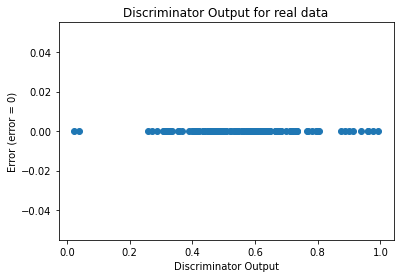

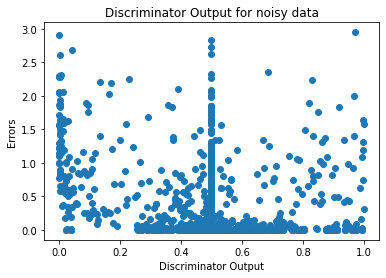

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 48


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.09814902557365394


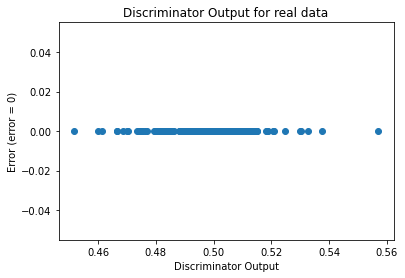

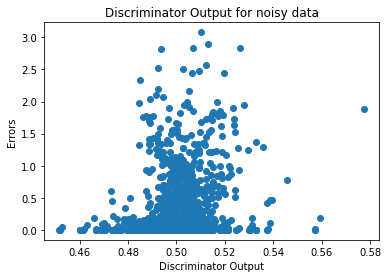

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01550984195486263


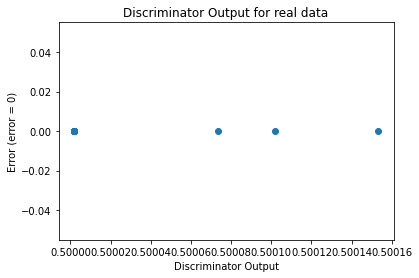

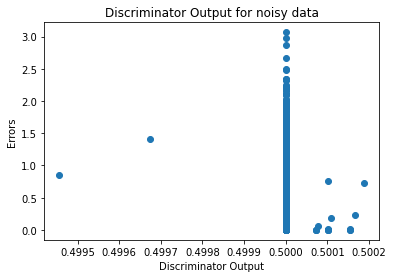

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0074]], requires_grad=True)
